In [1]:
import numpy as np
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
idm_path = 'idm/scan1/'
scalar_path = 'inelasticDarkMatter/nuevoScan/'

In [3]:
'''
def calc_mchi2_idm(mchi1, ma, gx, f):
    vphi = ma / (2*gx)
    return mchi1 + 2*f*vphi

def calc_lim_ms2_idm(alphad, ma):
    return ma**2 / (4*np.sqrt(np.pi)* alphad)
'''

def calc_values_idm(df_dat):
    mx1 = df_dat.column('Mx1')
    mx2 = mx1 + df_dat.column('deltamass')
    df_dat['Mx2'] =  mx2
    df_dat['delta'] = df_dat.column('Mx2') - df_dat.column('Mx1')
    df_dat['alphad'] = (df_dat.column('gX')**2)/(4*np.pi)
    df_dat['mass_relative'] = df_dat.column('delta') / df_dat.column('Mx1')
    return df_dat

def convertir_elementos_idm(df_):
    # Crear una copia del DataFrame original
    df = df_.copy() 
        
    # Convertir y redondear las columnas numéricas
    df['Mchi1'] = df['Mchi1'] * 1e3 
    df['MAp'] = df['MAp'] * 1e3
    #df['mphi'] = df['mphi'] * 1e3
    
    # Renombrar las columnas
    df = df.relabel('Mchi1', 'Mx1')
    df = df.relabel('Mchi2', 'Mx2')
    df = calc_values_idm(df)
    return df 

In [4]:
def calc_mchi2_scalar(mchi1, ma, gx, f):
    vphi = ma / (2*gx)
    return mchi1 + 2*f*vphi

def calc_lim_ms2_scalar(alphad, ma):
    return ma**2 / (4*np.sqrt(np.pi)* alphad)


def calc_values_scalar(df_dat):
    mx1 = df_dat.column('Mx1')
    yf = df_dat.column('yf')
    vphi = df_dat.column('MAp') / (2*df_dat.column('gX'))
    mx2 = mx1 + 2*yf*vphi
    df_dat['Mx2'] =  mx2
    df_dat['delta'] = df_dat.column('Mx2') - df_dat.column('Mx1')
    df_dat['alphad'] = (df_dat.column('gX')**2)/(4*np.pi)
    df_dat['alphaf'] = (df_dat.column('yf')**2)/(4*np.pi)
    #df_dat['ratio_ms2_map'] = df_dat.column('Ms2')**2 / calc_lim_ms2(df_dat.column('alphad'),df_dat.column('MAp'))
    df_dat['mass_relative'] = df_dat.column('delta') / df_dat.column('Mx1')
    return df_dat

def convertir_elementos_scalar(df_):
    # Crear una copia del DataFrame original
    df = df_.copy() 
        
    # Convertir y redondear las columnas numéricas
    df['Mchi1'] = df['Mchi1'] * 1e3 
    df['MAp'] = df['MAp'] * 1e3
    df['mphi'] = df['mphi'] * 1e3
    
    # Renombrar las columnas
    df = df.relabel('Mchi1', 'Mx1')
    df = df.relabel('Mchi2', 'Mx2')
    df = df.relabel('mphi', 'Ms2')
    df = df.relabel('ff', 'yf')
    df = df.relabel('angle', 'st')
    df = calc_values_scalar(df)
    return df 

In [5]:
def cargado_archivos(archivos):
    """
    Combina múltiples archivos CSV en una única tabla, manejando archivos vacíos o inexistentes.

    Args:
        archivos (list): Lista de rutas de archivos CSV.

    Returns:
        Table: Tabla combinada. Si no hay archivos válidos, retorna una tabla vacía.
    """
    datos = None  # Inicializamos como None para manejar el primer archivo válido

    for archivo in archivos:
        try:
            tabla_temp = Table.read_table(archivo)
            if tabla_temp.num_rows > 0:
                if datos is None:  # Primer archivo válido
                    datos = tabla_temp
                else:
                    datos.append(tabla_temp)  # Append a la tabla existente
        except FileNotFoundError:
            print(f"Error: {archivo} no existe.")
        except Exception as e:  # Otros errores (ej: formato incorrecto)
            print(f"Error al cargar {archivo}: {str(e)}")

    return Table() if datos is None else datos  # Retorna tabla vacía si no hay datos


#Los valores reportados por Planck
val_exp = 0.12 #Valor observado
error = 0.001 #Error reportado por Planck 
#Queremos que el valor sea calculado a 3 sigma, o sea, 3 veces el error reportado por Planck 
sigma = 3
val_por = sigma *  error 
val_min = round(val_exp - val_por,3)
val_max = round(val_exp + val_por,3)

def omega_idm(df_):
    global val_min, val_max
    df = df_.copy()
    df['Densidad reliquia'] = np.round(df.column('Densidad reliquia'),3)
    return df.where('Densidad reliquia', are.between_or_equal_to(val_min,val_max))

def omega_scalar(df_):
    global val_min, val_max
    df = df_.copy()
    df['Densidad reliquia'] = np.round(df.column('Densidad reliquia'),3)
    return df.where('Densidad reliquia', are.between_or_equal_to(val_min,val_max))

def graficador_elementos():
    plt.figure(figsize=(10,7))
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r'$\epsilon$',size=20)
    plt.xlabel(r'$M_{\chi_{1}}$ (MeV)',size=20)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlim(0.9,1e3+100)

In [8]:
archivos1 = ['nuevoScan2/analisis_random_Delta0p1_alpha0p5_R2.5_2.csv']
df_0p1_alpha_0p5_R5 = cargado_archivos(archivos1)

Error: nuevoScan2/analisis_random_Delta0p1_alpha0p5_R2.5_2.csv no existe.


In [6]:
archivos1 = [f'{idm_path}analisis_delta0p01MeV_new_1.csv',
            f'{idm_path}analisis_delta0p01MeV_new_2.csv']

df_0p01_idm = cargado_archivos(archivos1)

df_0p01_idm = convertir_elementos_idm(df_0p01_idm)
df_omega_0p01_idm = omega_idm(df_0p01_idm)
df_0p01_idm.show(3)
df_omega_0p01_idm.show(3)

MAp,Mx1,gX,epsilon,deltamass,Mx2,Densidad reliquia,loglikelihood,delta,alphad,mass_relative
1023.14,341.048,2.50663,4.93195e-05,1e-05,341.048,1.19,70.8434,1e-05,0.5,2.93214e-08
523.292,174.431,2.50663,1.5776e-06,1e-05,174.431,191,99.8738,1e-05,0.5,5.73293e-08
264.416,88.1385,2.50663,2.58975e-06,1e-05,88.1386,30.3,99.1879,1e-05,0.5,1.13458e-07


MAp,Mx1,gX,epsilon,deltamass,Mx2,Densidad reliquia,loglikelihood,delta,alphad,mass_relative
35.8561,11.952,2.50663,6.65399e-06,1e-05,11.952,0.119,0.000466938,1e-05,0.5,8.36678e-07
1678.2,559.4,2.50663,0.000272955,1e-05,559.4,0.12,0,1e-05,0.5,1.78763e-08
1678.2,559.4,2.50663,0.000272955,1e-05,559.4,0.12,0,1e-05,0.5,1.78763e-08


In [7]:
archivos1 = [f'{scalar_path}analisis_delta0p01MeV_new_1.csv',
            f'{scalar_path}analisis_delta0p01MeV_new_2.csv',
            f'{scalar_path}analisis_delta0p01MeV_new_3.csv',
            f'{scalar_path}analisis_delta0p01MeV_new_4.csv',]

df_0p01_scalar = cargado_archivos(archivos1)

df_0p01_scalar = convertir_elementos_scalar(df_0p01_scalar)

df_0p01_scalar.show(3)
df_omega_0p01_scalar = omega_scalar(df_0p01_scalar)
df_omega_0p01_scalar.show(3)

MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
3.25194,785.832,1.08398,0.0001,2.50663,9.87319e-05,0.00770809,1.09398,3.07e-05,7.19632,0.01,0.5,4.72807e-06,0.00922525
579.563,1.97509,193.188,0.0001,2.50663,0.000421475,4.32503e-05,193.198,0.00703,6.37953,0.01,0.5,1.48857e-10,5.17632e-05
230.367,2403.16,76.7889,0.0001,2.50663,1.74994e-06,0.00010881,76.7989,47.6,99.4877,0.01,0.5,9.42174e-10,0.000130227


MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
58.4841,9042.65,19.4947,0.0001,2.50663,1.09854e-05,0.0004286,19.5047,0.118,0.00186982,0.01,0.5,1.46182e-08,0.00051296
8.34648,11.1429,2.78216,0.0001,2.50663,1.96282e-06,0.00300321,2.79216,0.119,0.000466938,0.01,0.5,7.17733e-07,0.00359433
855.106,1.32962,285.035,0.0001,2.50663,0.000140741,2.93136e-05,285.045,0.118,0.00186982,0.01,0.5,6.83801e-11,3.50834e-05


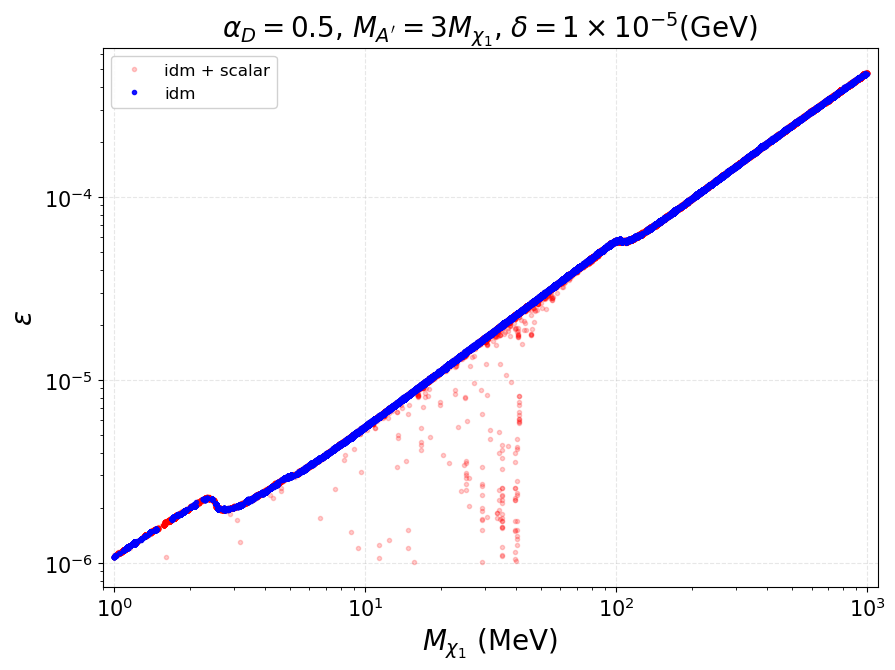

In [8]:
graficador_elementos()

plt.plot(df_omega_0p01_scalar.column('Mx1'), df_omega_0p01_scalar.column('epsilon') ,'.',color='red',alpha=0.2,label='idm + scalar')
plt.plot(df_omega_0p01_idm.column('Mx1'), df_omega_0p01_idm.column('epsilon') ,'.',color='blue',alpha=0.9,label='idm')

plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 1\times 10^{-5}$(GeV)',size=20)
plt.legend(fontsize=12, framealpha=0.9, loc='best')
plt.show()

In [9]:
archivos1 = [f'{idm_path}analisis_delta0p05MeV_new_1.csv',
            f'{idm_path}analisis_delta0p05MeV_new_2.csv']

df_0p05_idm = cargado_archivos(archivos1)

df_0p05_idm = convertir_elementos_idm(df_0p05_idm)
df_omega_0p05_idm = omega_idm(df_0p05_idm)
df_0p05_idm.show(3)
df_omega_0p05_idm.show(3)

MAp,Mx1,gX,epsilon,deltamass,Mx2,Densidad reliquia,loglikelihood,delta,alphad,mass_relative
1390.38,463.461,2.50663,0.000319672,5e-05,463.461,0.063,1.59289,5e-05,0.5,1.07884e-07
1201.65,400.551,2.50663,0.000905345,5e-05,400.551,0.00666,6.42155,5e-05,0.5,1.24828e-07
2141.79,713.931,2.50663,0.00036742,5e-05,713.931,0.107,0.0799247,5e-05,0.5,7.00348e-08


MAp,Mx1,gX,epsilon,deltamass,Mx2,Densidad reliquia,loglikelihood,delta,alphad,mass_relative
342.629,114.21,2.50663,5.7887e-05,5e-05,114.21,0.123,0.00418354,5e-05,0.5,4.37792e-07
342.629,114.21,2.50663,5.7887e-05,5e-05,114.21,0.123,0.00418354,5e-05,0.5,4.37792e-07
2314.88,771.628,2.50663,0.00036742,5e-05,771.628,0.123,0.00418354,5e-05,0.5,6.47981e-08


In [10]:
archivos1 = [f'{scalar_path}analisis_delta0p05MeV_new_1.csv',
            f'{scalar_path}analisis_delta0p05MeV_new_2.csv',]

df_0p05_scalar = cargado_archivos(archivos1)

df_0p05_scalar = convertir_elementos_scalar(df_0p05_scalar)
df_omega_0p05_scalar = omega_scalar(df_0p05_scalar)
df_0p05_scalar.show(3)
df_omega_0p05_scalar.show(3)

MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
25.8226,7840.17,8.60752,0.0001,2.50663,6.2305e-06,0.00485356,8.65752,0.0753,0.971502,0.05,0.5,1.87461e-06,0.00580887
297.993,150.902,99.3309,0.0001,2.50663,1.29262e-06,0.000420585,99.3809,122,99.802,0.05,0.5,1.40766e-08,0.000503368
2863.16,603.438,954.385,0.0001,2.50663,0.000155886,4.37739e-05,954.435,0.903,60.3785,0.05,0.5,1.52483e-10,5.23898e-05


MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
579.062,15.3436,193.021,0.0001,2.50663,9.57171e-05,0.000216439,193.071,0.117,0.00421173,0.05,0.5,3.72787e-09,0.00025904
108.259,3425.33,36.0865,0.0001,2.50663,2.04122e-05,0.0011577,36.1365,0.121,0.000465894,0.05,0.5,1.06654e-07,0.00138556
54.2721,33.6254,18.0907,0.0001,2.50663,1.01804e-05,0.00230931,18.1407,0.12,0,0.05,0.5,4.24381e-07,0.00276385


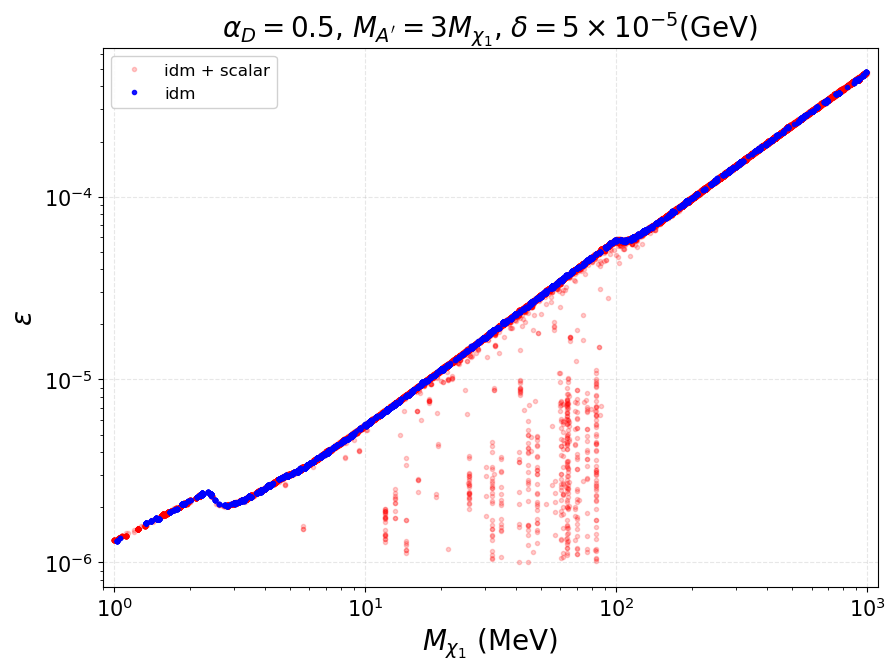

In [11]:
graficador_elementos()

plt.plot(df_omega_0p05_scalar.column('Mx1'), df_omega_0p05_scalar.column('epsilon') ,'.',color='red',alpha=0.2,label='idm + scalar')
plt.plot(df_omega_0p05_idm.column('Mx1'), df_omega_0p05_idm.column('epsilon') ,'.',color='blue',alpha=0.9,label='idm')

plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 5\times 10^{-5}$(GeV)',size=20)
plt.legend(fontsize=12, framealpha=0.9, loc='best')
plt.show()

In [12]:
archivos1 = [f'{idm_path}analisis_delta0p1_alpha0p5MeV_new_1.csv',
            f'{idm_path}analisis_delta0p1_alpha0p5MeV_new_2.csv']

df_0p1_idm = cargado_archivos(archivos1)

df_0p1_idm = convertir_elementos_idm(df_0p1_idm)
df_omega_0p1_idm = omega_idm(df_0p1_idm)
df_0p1_idm.show(3)
df_omega_0p1_idm.show(3)

MAp,Mx1,gX,epsilon,deltamass,Mx2,Densidad reliquia,loglikelihood,delta,alphad,mass_relative
103.751,34.5838,2.50663,3.7391e-06,0.0001,34.5839,2.63,88.5231,0.0001,0.5,2.89153e-06
422.834,140.945,2.50663,0.000632069,0.0001,140.945,0.00183,6.98196,0.0001,0.5,7.09499e-07
6.82871,2.27624,2.50663,1.74439e-05,0.0001,2.27634,0.00428,6.69495,0.0001,0.5,4.39322e-05


MAp,Mx1,gX,epsilon,deltamass,Mx2,Densidad reliquia,loglikelihood,delta,alphad,mass_relative
457.802,152.601,2.50663,7.40202e-05,0.0001,152.601,0.123,0.00418354,0.0001,0.5,6.55305e-07
457.802,152.601,2.50663,7.40202e-05,0.0001,152.601,0.123,0.00418354,0.0001,0.5,6.55305e-07
504.522,168.174,2.50663,8.15111e-05,0.0001,168.174,0.123,0.00418354,0.0001,0.5,5.94622e-07


In [13]:
archivos1 = [f'{scalar_path}analisis_delta0p1MeV_alpha0p5_1.csv',
            f'{scalar_path}analisis_delta0p1MeV_alpha0p5_2.csv',]

df_0p1_scalar = cargado_archivos(archivos1)

df_0p1_scalar = convertir_elementos_scalar(df_0p1_scalar)
df_omega_0p1_scalar = omega_scalar(df_0p1_scalar)
df_0p1_scalar.show(3)
df_omega_0p1_scalar.show(3)

MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
37.6802,20.6197,12.5601,0.0001,2.50663,1.48532e-05,0.00665237,12.6601,0.0308,3.95954,0.1,0.5,3.52162e-06,0.00796173
6.88856,526.981,2.29619,0.0001,2.50663,0.000291262,0.0363883,2.39619,2.81e-05,7.19663,0.1,0.5,0.000105369,0.0435504
5.25561,1005.12,1.75187,0.0001,2.50663,2.62031e-05,0.0476943,1.85187,0.00169,6.99853,0.1,0.5,0.000181019,0.0570818


MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
7.54811,818.212,2.51604,0.0001,2.50663,2.30453e-06,0.0332087,2.61604,0.118,0.00186982,0.1,0.5,8.77594e-05,0.0397451
131.285,6.92181,43.7618,0.0001,2.50663,2.38289e-05,0.0019093,43.8618,0.122,0.00186147,0.1,0.5,2.90093e-07,0.0022851
475.105,156.437,158.368,0.0001,2.50663,6.27546e-05,0.000527595,158.468,0.123,0.00418354,0.1,0.5,2.21509e-08,0.00063144


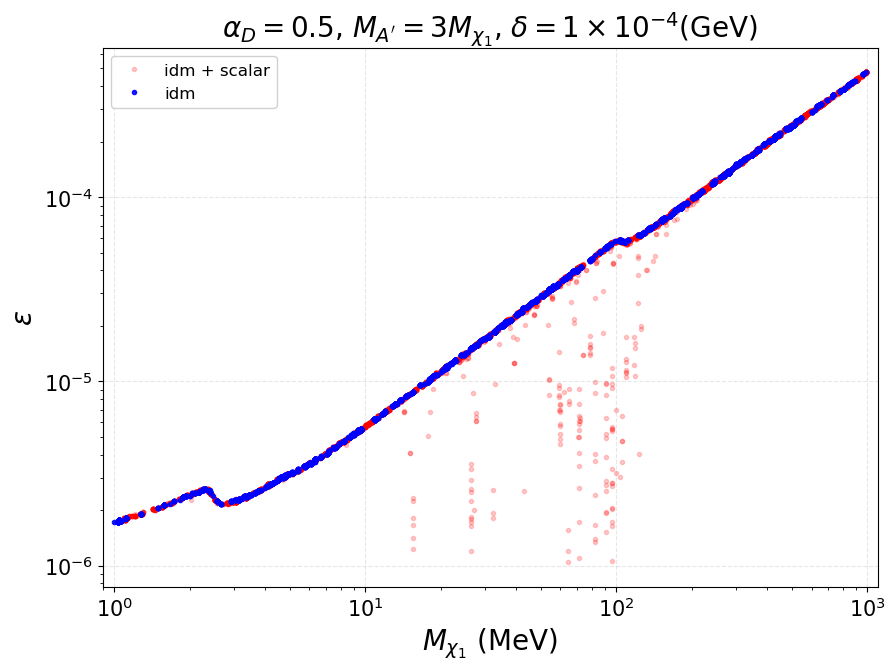

In [14]:
graficador_elementos()

plt.plot(df_omega_0p1_scalar.column('Mx1'), df_omega_0p1_scalar.column('epsilon') ,'.',color='red',alpha=0.2,label='idm + scalar')
plt.plot(df_omega_0p1_idm.column('Mx1'), df_omega_0p1_idm.column('epsilon') ,'.',color='blue',alpha=0.9,label='idm')

plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 1\times 10^{-4}$(GeV)',size=20)
plt.legend(fontsize=12, framealpha=0.9, loc='best')
plt.show()

In [15]:
archivos1 = [f'{idm_path}analisis_delta0p5_alpha0p5MeV_new_1.csv',
            f'{idm_path}analisis_delta0p5_alpha0p5MeV_new_2.csv']

df_0p5_idm = cargado_archivos(archivos1)

df_0p5_idm = convertir_elementos_idm(df_0p5_idm)
df_omega_0p5_idm = omega_idm(df_0p5_idm)
df_0p5_idm.show(3)
df_omega_0p5_idm.show(3)

MAp,Mx1,gX,epsilon,deltamass,Mx2,Densidad reliquia,loglikelihood,delta,alphad,mass_relative
7.47754,2.49251,2.50663,8.62976e-05,0.0005,2.49301,0.00203,6.95832,0.0005,0.5,0.000200601
12.2401,4.08002,2.50663,1.90916e-06,0.0005,4.08052,0.504,32.4782,0.0005,0.5,0.000122548
84.9008,28.3003,2.50663,6.79363e-05,0.0005,28.3008,0.00959,6.09238,0.0005,0.5,1.76677e-05


MAp,Mx1,gX,epsilon,deltamass,Mx2,Densidad reliquia,loglikelihood,delta,alphad,mass_relative
214.758,71.5859,2.50663,4.2615e-05,0.0005,71.5864,0.121,0.000465894,0.0005,0.5,6.98461e-06
1303.24,434.413,2.50663,0.000214928,0.0005,434.414,0.12,0,0.0005,0.5,1.15098e-06
36.7107,12.2369,2.50663,8.33161e-06,0.0005,12.2374,0.118,0.00186982,0.0005,0.5,4.086e-05


In [16]:
archivos1 = [f'{scalar_path}analisis_delta0p5MeV_alpha0p5_1.csv',
            f'{scalar_path}analisis_delta0p5MeV_alpha0p5_2.csv',]

df_0p5_scalar = cargado_archivos(archivos1)

df_0p5_scalar = convertir_elementos_scalar(df_0p5_scalar)
df_omega_0p5_scalar = omega_scalar(df_0p5_scalar)
df_0p5_scalar.show(3)
df_omega_0p5_scalar.show(3)

MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
17.9687,559.447,5.98958,0.0001,2.50663,3.27891e-06,0.0697497,6.48958,0.252,6.61242,0.5,0.5,0.000387146,0.0834783
10.0943,328.294,3.36477,0.0001,2.50663,4.05859e-05,0.124161,3.86477,0.00395,6.73328,0.5,0.5,0.00122675,0.148599
19.8137,4.01265,6.60458,0.0001,2.50663,3.62746e-05,0.0632548,7.10458,1.36e-07,7.19998,0.5,0.5,0.000318403,0.0757051


MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
2092.44,4.85226,697.481,0.0001,2.50663,0.00034473,0.000598972,697.981,0.117,0.00421173,0.5,0.5,2.85498e-08,0.000716865
1358,1.40456,452.667,0.0001,2.50663,0.000223792,0.000922911,453.167,0.12,0,0.5,0.5,6.77812e-08,0.00110456
832.289,33.4954,277.43,0.0001,2.50663,0.000137058,0.00150586,277.93,0.121,0.000465894,0.5,0.5,1.80452e-07,0.00180226


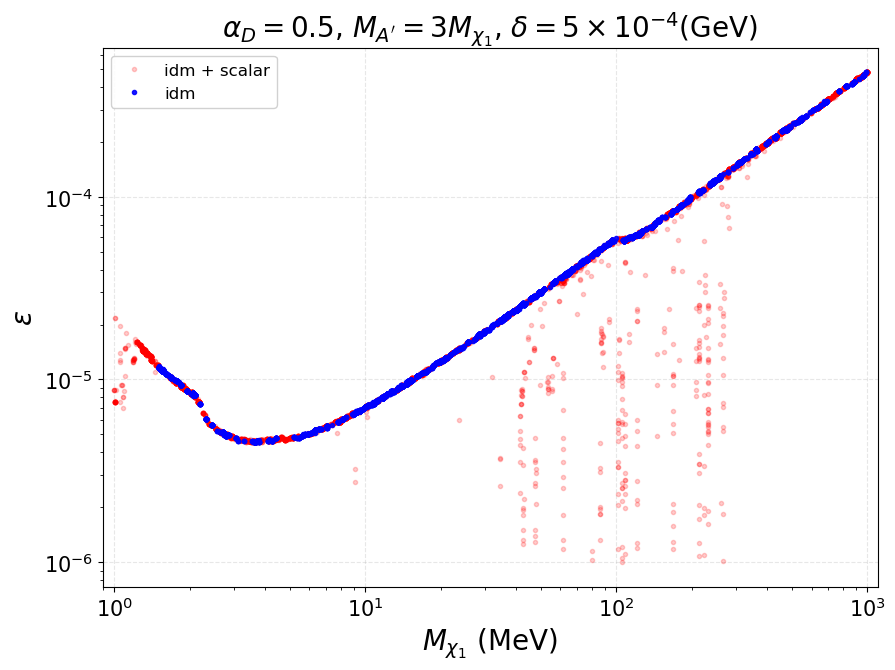

In [17]:
graficador_elementos()

plt.plot(df_omega_0p5_scalar.column('Mx1'), df_omega_0p5_scalar.column('epsilon') ,'.',color='red',alpha=0.2,label='idm + scalar')
plt.plot(df_omega_0p5_idm.column('Mx1'), df_omega_0p5_idm.column('epsilon') ,'.',color='blue',alpha=0.9,label='idm')

plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 5\times 10^{-4}$(GeV)',size=20)
plt.legend(fontsize=12, framealpha=0.9, loc='best')
plt.show()

In [18]:
archivos1 = [f'{idm_path}analisis_delta1_alpha0p5MeV_new_1.csv',
            f'{idm_path}analisis_delta1_alpha0p5MeV_new_2.csv']

df_1_idm = cargado_archivos(archivos1)

df_1_idm = convertir_elementos_idm(df_1_idm)
df_omega_1_idm = omega_idm(df_1_idm)
df_1_idm.show(3)
df_omega_1_idm.show(3)

MAp,Mx1,gX,epsilon,deltamass,Mx2,Densidad reliquia,loglikelihood,delta,alphad,mass_relative
4.69861,1.5662,2.50663,0.00025167,0.001,1.5672,1e+10,100,0.001,0.5,0.000638486
2595.44,865.148,2.50663,1.02691e-05,0.001,865.149,115,99.7899,0.001,0.5,1.15587e-06
15.9665,5.32217,2.50663,0.000620714,0.001,5.32317,0.000185,7.17782,0.001,0.5,0.000187893


MAp,Mx1,gX,epsilon,deltamass,Mx2,Densidad reliquia,loglikelihood,delta,alphad,mass_relative
1727.18,575.727,2.50663,0.00028862,0.001,575.728,0.117,0.00421173,0.001,0.5,1.73694e-06
1727.18,575.727,2.50663,0.00028862,0.001,575.728,0.117,0.00421173,0.001,0.5,1.73694e-06
26.7914,8.93048,2.50663,9.15563e-06,0.001,8.93148,0.123,0.00418354,0.001,0.5,0.000111976


In [19]:
archivos1 = [f'{scalar_path}analisis_delta1MeV_alpha0p5_1.csv',
            f'{scalar_path}analisis_delta1MeV_alpha0p5_2.csv',]

df_1_scalar = cargado_archivos(archivos1)

df_1_scalar = convertir_elementos_scalar(df_1_scalar)
df_omega_1_scalar = omega_scalar(df_1_scalar)
df_1_scalar.show(3)
df_omega_1_scalar.show(3)

MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
1312.82,2.34464,437.607,0.0001,2.50663,1.81843e-06,0.00190935,438.607,196,99.8771,1,0.5,2.90108e-07,0.00228516
328.464,4097.11,109.488,0.0001,2.50663,1.2237e-06,0.00763137,110.488,148,99.837,1,0.5,4.63442e-06,0.00913343
53.8703,1427.74,17.9568,0.0001,2.50663,2.96241e-06,0.0465308,18.9568,1.74,81.3112,1,0.5,0.000172294,0.0556893


MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
5.85431,275.67,1.95144,0.0001,2.50663,0.00066044,0.428168,2.95144,0.117,0.00421173,1,0.5,0.0145888,0.512443
60.035,817.28,20.0117,0.0001,2.50663,1.45318e-05,0.0417528,21.0117,0.122,0.00186147,1,0.5,0.000138727,0.0499708
312.683,10.7951,104.228,0.0001,2.50663,5.72425e-05,0.00801652,105.228,0.117,0.00421173,1,0.5,5.11402e-06,0.00959439


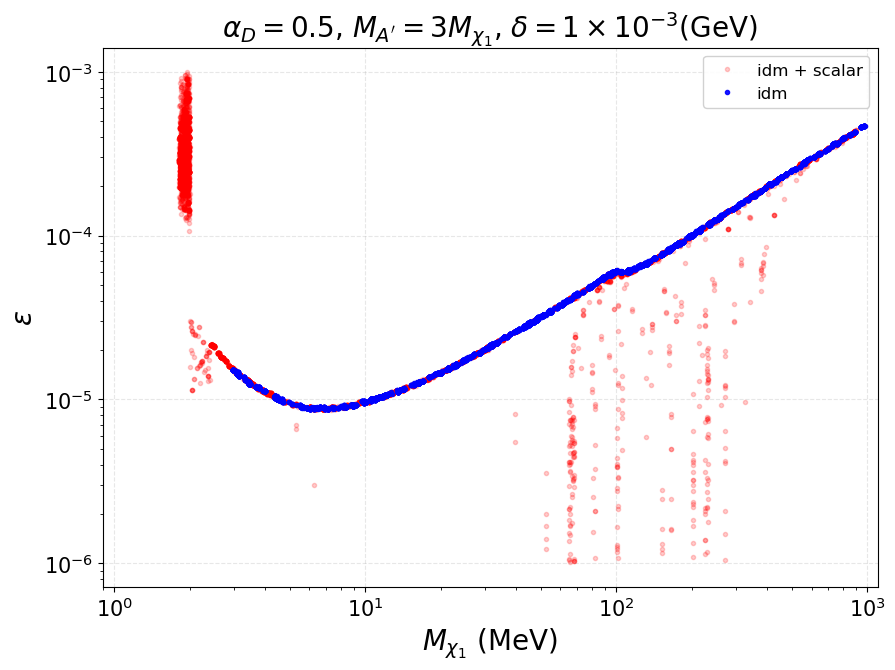

In [20]:
graficador_elementos()

plt.plot(df_omega_1_scalar.column('Mx1'), df_omega_1_scalar.column('epsilon') ,'.',color='red',alpha=0.2,label='idm + scalar')
plt.plot(df_omega_1_idm.column('Mx1'), df_omega_1_idm.column('epsilon') ,'.',color='blue',alpha=0.9,label='idm')

plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 1\times 10^{-3}$(GeV)',size=20)
plt.legend(fontsize=12, framealpha=0.9, loc='best')
plt.show()